In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix


In [330]:
Data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [331]:
print(Data.shape)
Data.describe

(7043, 21)


<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [245]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [246]:
# 1.Identify rows with missing data points and eliminate them
Data.replace(np.inf, np.nan, inplace=True)
Data.dropna(inplace=True)
print(Data.shape)
print('There are no missing data, all data are in order.')

(7043, 21)
There are no missing data, all data are in order.


In [377]:
col_1 = ['customerID','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','Churn']
col_2 = ['DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
data_1 = Data[col_1]
data_1.head()
# Categorical columns only
col_3 = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [333]:
data_2= Data[col_2]
data_2.head()

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [249]:
print('Our data contains 21 columns with 19 features and 1 Target variable:Churn.\n Our data includes both numerical and categorical variables.')


Our data contains 21 columns with 19 features and 1 Target variable:Churn.
 Our data includes both numerical and categorical variables.


In [251]:
#EDA


No     5174
Yes    1869
Name: Churn, dtype: int64


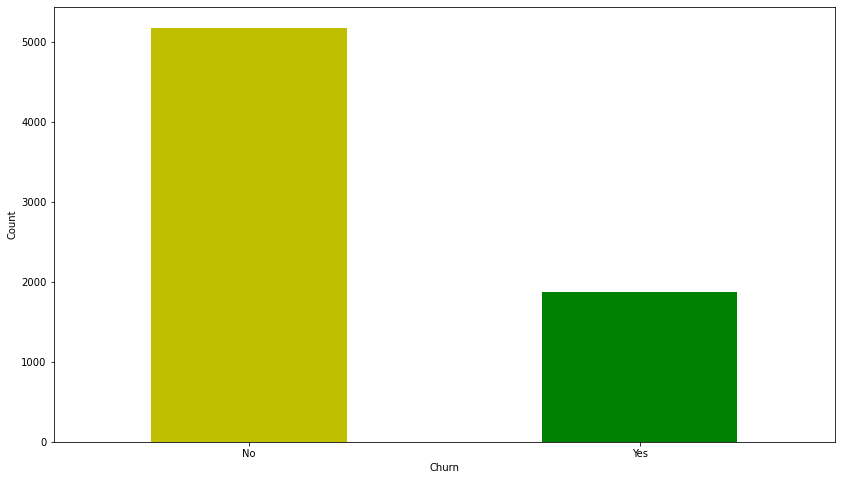

In [252]:
# number of churns(yes/No).
print(Data["Churn"].value_counts())
fig, ax = plt.subplots()

Data.groupby(Data["Churn"]).size().plot(kind='bar',figsize=(14,8),rot=0,color=['y','g'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [234]:
#Data.Churn.unique()
#Data.Churn.replace({
#    'Yes':1,
#    'No':2
#},inplace=True)
#Data.head()

In [386]:
# Numerical features
# we need to change the datatype of TotalCharges from string to float.
Data.TotalCharges= pd.to_numeric(Data.TotalCharges, errors='coerce') 
df_n = Data[['tenure','MonthlyCharges','TotalCharges']]
df_n.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


Text(0, 0.5, 'TotalCharges')

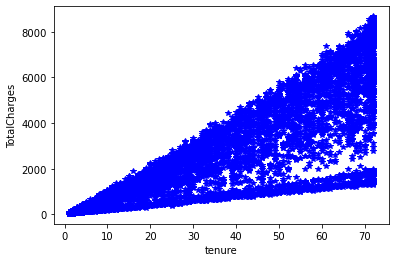

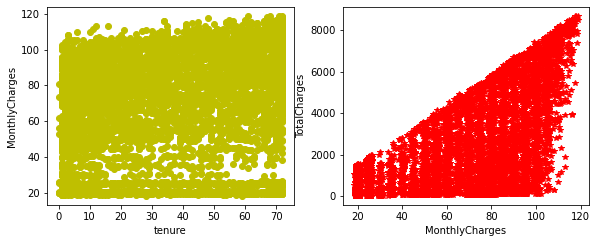

In [253]:
plt.figure(num=1)
plt.plot(df_n.tenure,df_n.TotalCharges,linestyle="None", marker="*",color = 'b')
plt.xlabel('tenure')
plt.ylabel('TotalCharges')

plt.figure(num=2, figsize=(15,8))
plt.subplot(2,3,1)
plt.plot(df_n.tenure,df_n.MonthlyCharges,linestyle="None", marker="o",color = 'y')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')

plt.subplot(2,3,2)
plt.plot(df_n.MonthlyCharges,df_n.TotalCharges,linestyle="None", marker="*",color = 'r')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')


gender
Female    3488
Male      3555
Name: Churn, dtype: int64


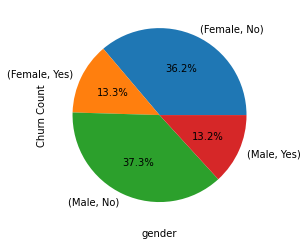

In [334]:
# Categorical features
df1 = Data.groupby('gender')['Churn'].count()
print(df1)
Data.groupby(["gender","Churn"])["Churn"].count().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('gender')
plt.ylabel('Churn Count')
plt.show()

Text(0, 0.5, 'Churn Count')

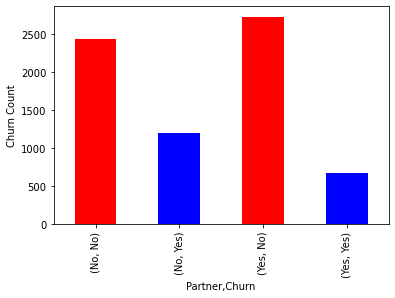

In [255]:
Data.groupby(['Partner','Churn'])['Churn'].count().plot(kind='bar',color=['r','b'])
plt.ylabel('Churn Count')

Text(0, 0.5, 'Churn Count')

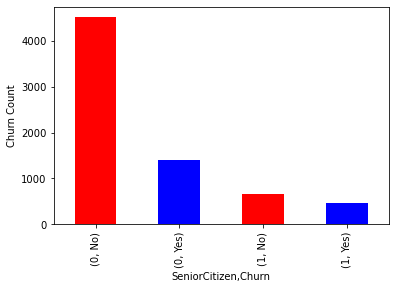

In [256]:
Data.groupby(['SeniorCitizen','Churn'])['Churn'].count().plot(kind='bar',color=['r','b'])
plt.ylabel('Churn Count')

Text(0, 0.5, 'Churn Count')

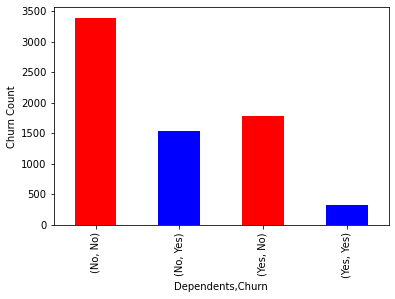

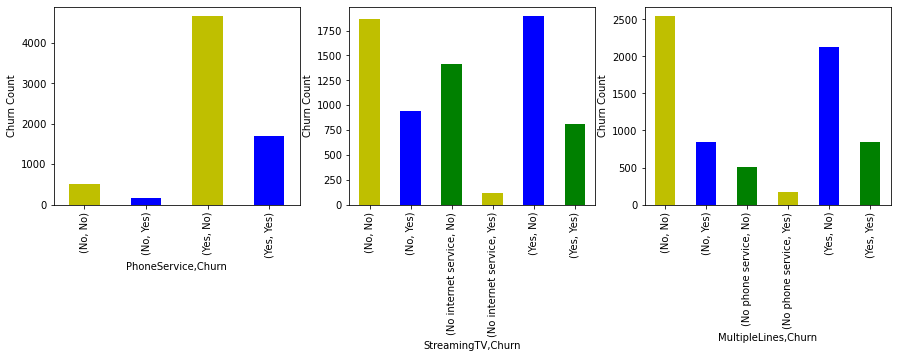

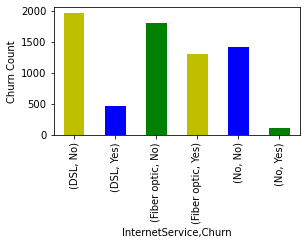

In [265]:
Data.groupby(['Dependents','Churn'])['Churn'].count().plot(kind='bar',color=['r','b'])
plt.ylabel('Churn Count')

plt.figure(num=2, figsize=(15,8))
plt.subplot(2,3,1)
Data.groupby(["PhoneService","Churn"])["Churn"].count().plot(kind='bar',color=['y','b'])
plt.ylabel('Churn Count')

plt.subplot(2,3,2)
Data.groupby(["StreamingTV","Churn"])["Churn"].count().plot(kind='bar',color=['y','b','g'])
plt.ylabel('Churn Count')

plt.subplot(2,3,3)
Data.groupby(["MultipleLines","Churn"])["Churn"].count().plot(kind='bar',color=['y','b','g'])
plt.ylabel('Churn Count')

plt.figure(num=3, figsize=(15,8))
plt.subplot(3,3,1)
Data.groupby(["InternetService","Churn"])["Churn"].count().plot(kind='bar',color=['y','b','g'])
plt.ylabel('Churn Count')

Text(0, 0.5, 'Churn Count')

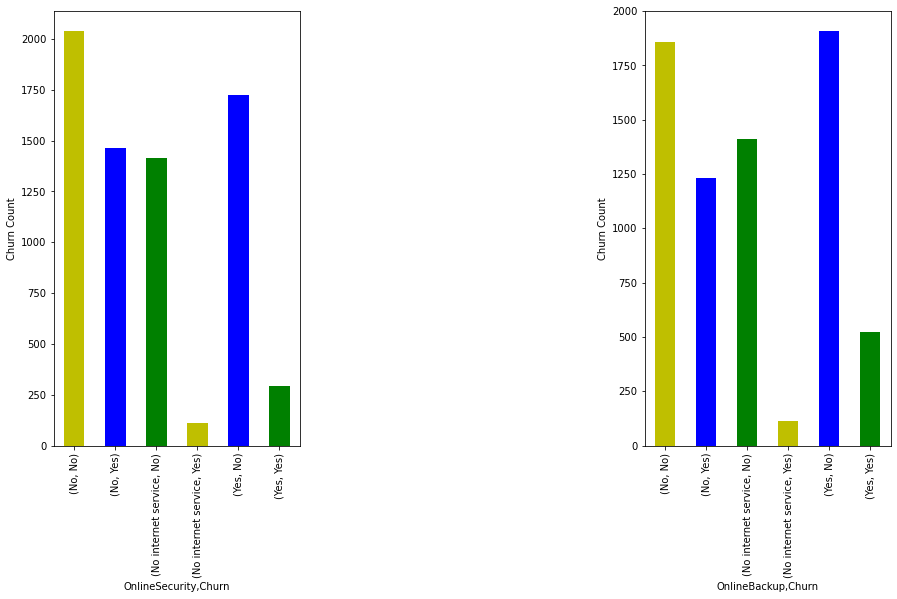

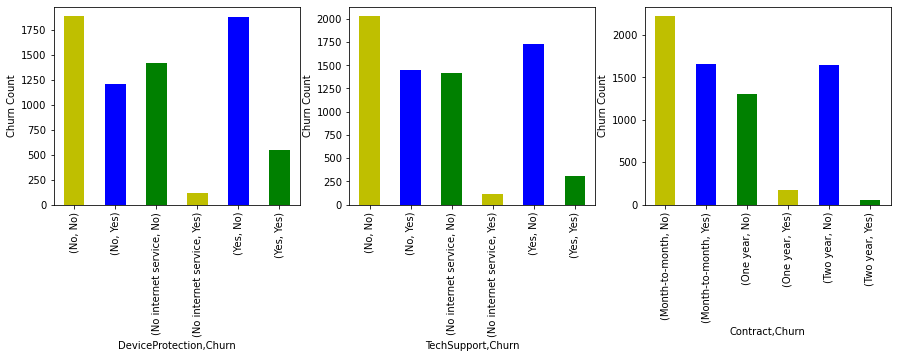

In [266]:
plt.figure(num=1, figsize=(15,8))
plt.subplot(1,3,1)
Data.groupby(["OnlineSecurity","Churn"])["Churn"].count().plot(kind='bar',color=['y','b','g'])
plt.ylabel('Churn Count')

plt.subplot(1,3,3)
Data.groupby(["OnlineBackup","Churn"])["Churn"].count().plot(kind='bar',color=['y','b','g'])
plt.ylabel('Churn Count')

plt.figure(num=2, figsize=(15,8))
plt.subplot(2,3,1)
Data.groupby(["DeviceProtection","Churn"])["Churn"].count().plot(kind='bar',color=['y','b','g'])
plt.ylabel('Churn Count')

plt.subplot(2,3,2)
Data.groupby(["TechSupport","Churn"])["Churn"].count().plot(kind='bar',color=['y','b','g'])
plt.ylabel('Churn Count')

plt.subplot(2,3,3)
Data.groupby(["Contract","Churn"])["Churn"].count().plot(kind='bar',color=['y','b','g'])
plt.ylabel('Churn Count')

Text(0, 0.5, 'Churn Count')

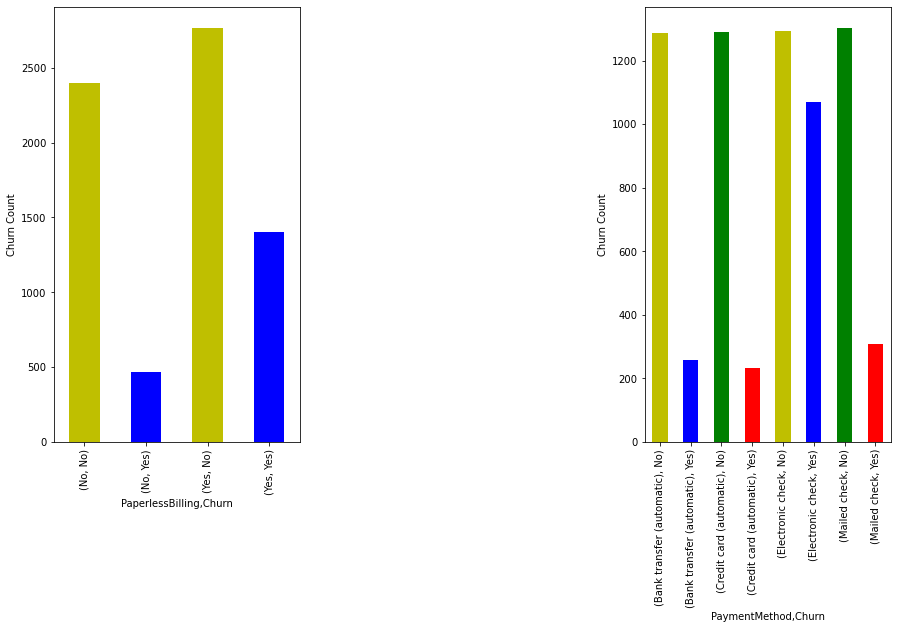

In [276]:
plt.figure(num=1, figsize=(15,8))
plt.subplot(1,3,1)
Data.groupby(["PaperlessBilling","Churn"])["Churn"].count().plot(kind='bar',color=['y','b'])
plt.ylabel('Churn Count')


plt.subplot(1,3,3)
Data.groupby(["PaymentMethod","Churn"])["Churn"].count().plot(kind='bar',color=['y','b','g','r'])
plt.ylabel('Churn Count')

In [390]:
# Preprocessing of the data before applying logistic model. Removing irrelevant columns and encoding binary values to the categorical
df2 = Data.drop(['customerID'],axis=1)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [391]:
#assigning binary number to target variable churn
df2.Churn.replace({'Yes':1, 'No':2}, inplace=True)
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,2
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2


In [393]:
# using dummy variable for categorocal variable
dum_df = pd.get_dummies(df2, columns = col_3)
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   uint8  
 6   gender_Male                              7043 non-null   uint8  
 7   Partner_No                               7043 non-null   uint8  
 8   Partner_Yes                              7043 non-null   uint8  
 9   Dependents_No                            7043 non-null   uint8  
 10  Dependents_Yes                           7043 no

In [394]:
dum_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,2,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,2,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,2,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

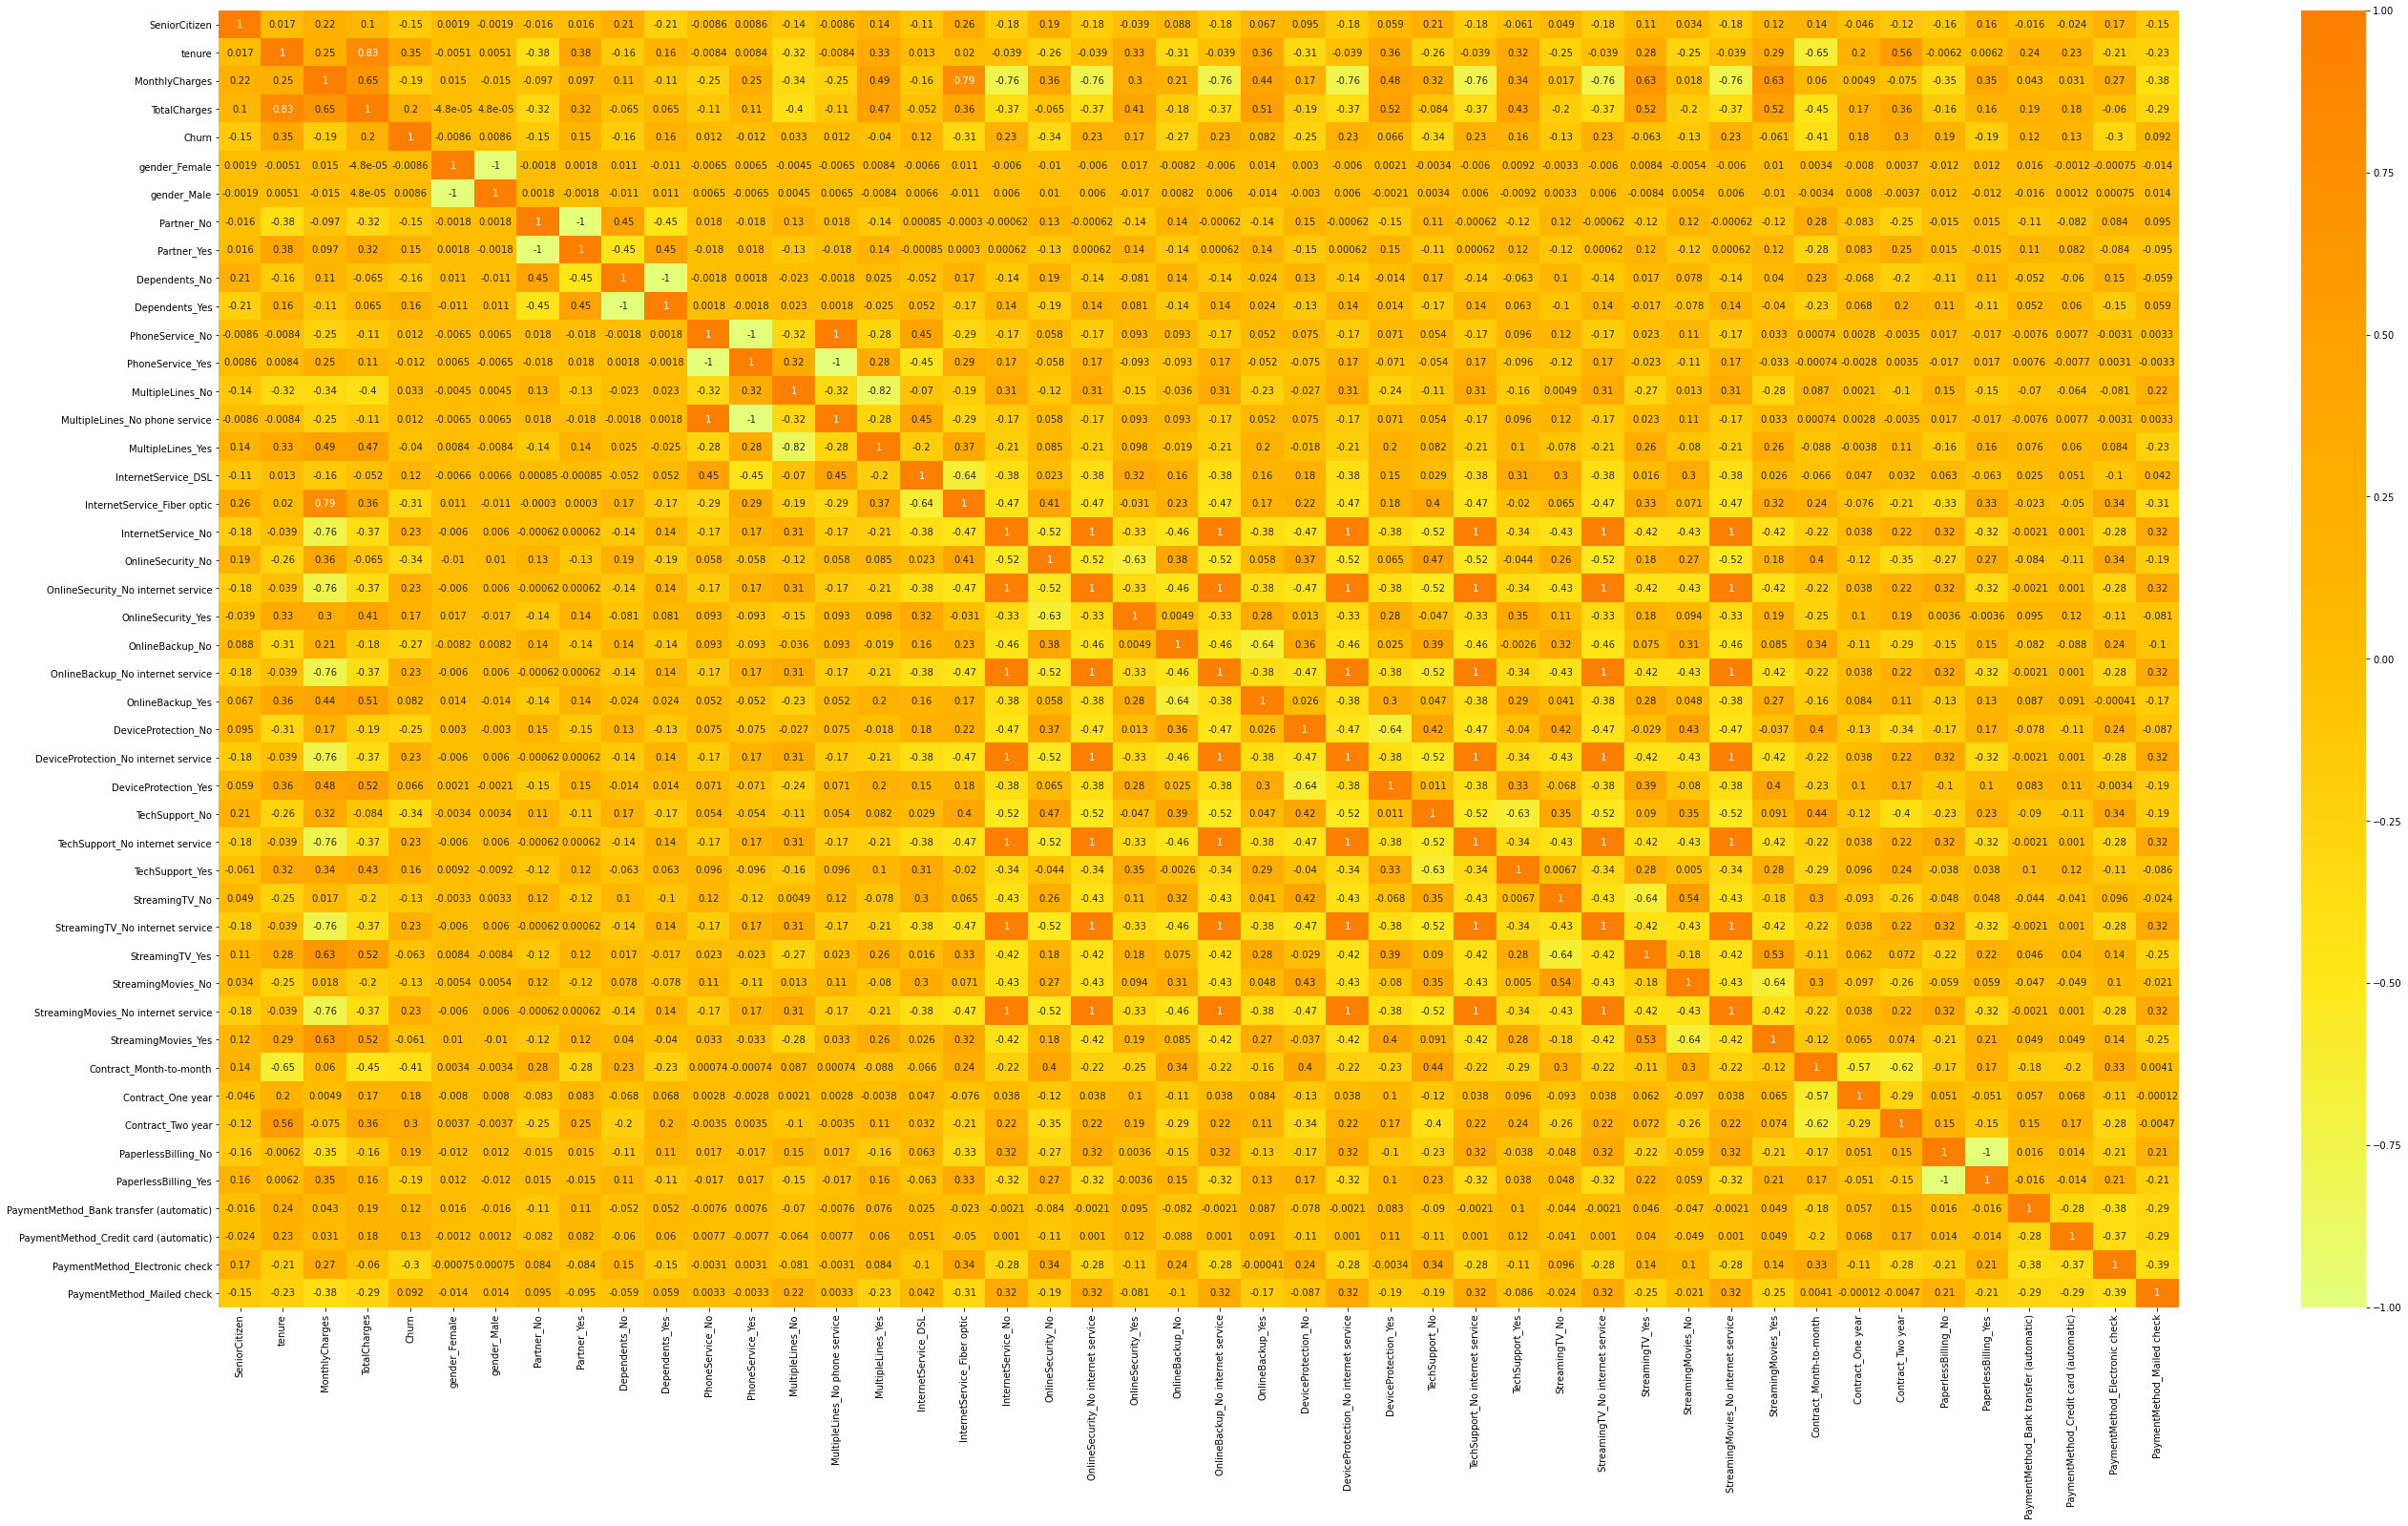

In [401]:
# correlation plot
corr = dum_df.corr()
plt.figure(figsize=(46,25))
sns.heatmap(corr,cmap = 'Wistia',annot=True)


In [403]:
#Correlation with target variable
cor_target = abs(corr["Churn"])
cor_target

SeniorCitizen                              0.150889
tenure                                     0.352229
MonthlyCharges                             0.193356
TotalCharges                               0.199484
Churn                                      1.000000
gender_Female                              0.008612
gender_Male                                0.008612
Partner_No                                 0.150448
Partner_Yes                                0.150448
Dependents_No                              0.164221
Dependents_Yes                             0.164221
PhoneService_No                            0.011942
PhoneService_Yes                           0.011942
MultipleLines_No                           0.032569
MultipleLines_No phone service             0.011942
MultipleLines_Yes                          0.040102
InternetService_DSL                        0.124214
InternetService_Fiber optic                0.308020
InternetService_No                         0.227890
OnlineSecuri

In [525]:
# Reduction of features (PCA)

x= dum_df.drop(['Churn'],axis=1)
y=dum_df.Churn
x.replace(np.inf, np.nan, inplace=True)
x.dropna(inplace=True)
x.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [526]:
y.head(2)

0    2
1    2
Name: Churn, dtype: int64

In [527]:
y=y.drop(index=[488,753,936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])

In [528]:
y.shape

(7032,)

In [608]:
x.iloc[:,2]

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [620]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dscaled = scaler.fit_transform(x)
print(dscaled)
print('shape:',dscaled.shape)

[[-0.44032709 -1.28024804 -1.16169394 ... -0.5253508   1.40476387
  -0.54360352]
 [-0.44032709  0.06430269 -0.26087792 ... -0.5253508  -0.71186341
   1.83957601]
 [-0.44032709 -1.23950408 -0.36392329 ... -0.5253508  -0.71186341
   1.83957601]
 ...
 [-0.44032709 -0.87280842 -1.17000405 ... -0.5253508   1.40476387
  -0.54360352]
 [ 2.27103902 -1.15801615  0.31916782 ... -0.5253508  -0.71186341
   1.83957601]
 [-0.44032709  1.36810945  1.35793167 ... -0.5253508  -0.71186341
  -0.54360352]]
shape: (7032, 45)


In [621]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
d_pca = pca.fit_transform(dscaled)
d_pca.shape

(7032, 18)

In [622]:
pca.n_components_

18

In [623]:
pca.explained_variance_ratio_

array([0.25212342, 0.13517441, 0.09429404, 0.05649085, 0.05006256,
       0.04448762, 0.03712321, 0.03459656, 0.03032367, 0.02876096,
       0.02846248, 0.026729  , 0.02584244, 0.02514638, 0.02372028,
       0.02191617, 0.02053965, 0.0193296 ])

In [624]:
#we require 6 best feature reduction and therefore 
pca = PCA(n_components=6)
d1_pca = pca.fit_transform(dscaled)
d1_pca.shape

(7032, 6)

In [638]:
print('___________PCA_Summary_____________')
print('No of pc components:',pca.n_components_)
print('No of samples:', pca.n_samples_)
print('No of features:',pca.n_features_)
print('Percentage_variance_ratio_by_selected_components:',pca.explained_variance_ratio_)

___________PCA_Summary_____________
No of pc components: 6
No of samples: 7032
No of features: 45
Percentage_variance_ratio_by_selected_components: [0.25212342 0.1351744  0.09429403 0.05648952 0.05005483 0.04447549]


In [639]:
# building model
# splitting the model for training and testing
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca,y_train, y_test = train_test_split(d1_pca,y,test_size=0.3, random_state=30)

In [640]:
# applying logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_pca,y_train)
print('model accuracy:',model.score(x_test_pca,y_test))

model accuracy: 0.7909952606635071


In [641]:
print('The above score tells that, the model gives 79 percent accuracy by training on these features using\n PCA feature reduction technique.')

The above score tells that, the model gives 79 percent accuracy by training on these features using
 PCA feature reduction technique.


[[ 281  279]
 [ 162 1388]]


<function matplotlib.pyplot.show(close=None, block=None)>

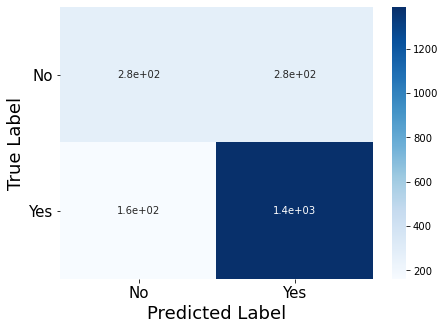

In [642]:
# Confusion matrix
y_pred_pca = model.predict(x_test_pca)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_pca)
print(confusion_matrix)

plt.subplots(figsize=(7,5))
res=sns.heatmap(confusion_matrix,annot=True,cmap=plt.cm.Blues,xticklabels=np.unique(Data.iloc[:,20]),yticklabels=np.unique(Data.iloc[:,20]))
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=15, rotation=0)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=15, rotation=0)
res.set_ylabel('True Label',fontsize=18)
res.set_xlabel('Predicted Label', fontsize=18)
plt.show

In [644]:
# now, let us cross check the above results by building the model without feature reduction.

x_train, x_test,y_train, y_test = train_test_split(dscaled,y,test_size=0.3, random_state=30)

In [645]:
# applying logistic regression model for without PCA
model = LogisticRegression()
model.fit(x_train,y_train)
print('model accuracy without feature reduction:',model.score(x_test,y_test))

model accuracy without feature reduction: 0.7971563981042654


In [646]:
print('The above model score proove that our regression model using PCA with 6 max feature components holds accurate.')

The above model score proove that our regression model using PCA with 6 max feature components holds accurate.


[[ 296  264]
 [ 164 1386]]


<function matplotlib.pyplot.show(close=None, block=None)>

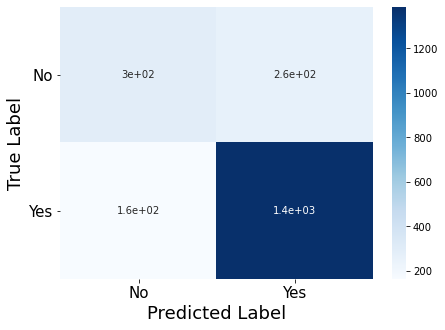

In [647]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)

plt.subplots(figsize=(7,5))
res=sns.heatmap(confusion_matrix2,annot=True,cmap=plt.cm.Blues,xticklabels=np.unique(Data.iloc[:,20]),yticklabels=np.unique(Data.iloc[:,20]))
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=15, rotation=0)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=15, rotation=0)
res.set_ylabel('True Label',fontsize=18)
res.set_xlabel('Predicted Label', fontsize=18)
plt.show